# Методы снижения размерности признакового пространства

## Метод главных компонент (Principal component analysis - PCA)
### Введение

Дана матрица данных $X$:

|     | $X_1$ | $X_2$ | $X_3$ | ... | $X_d$ |
| --- | --- | --- | --- | --- |--- |
| $\textbf{x}_1$  | $x_{11}$ | $x_{12}$ | $x_{13}$ | ... | $x_{1d}$ |
| $\textbf{x}_2$  | $x_{21}$ | $x_{22}$ | $x_{23}$ | ... | $x_{2d}$ |
| $\textbf{x}_3$  | $x_{31}$ | $x_{21}$ | $x_{33}$ | ... | $x_{3d}$ |
| ...  | ... | ... | ... | ... | ... |
| $\textbf{x}_n$  | $x_{n1}$ | $x_{n1}$ | $x_{n3}$ | ... | $x_{nd}$ |

где $\textbf{x}_i$ - это объект, $X_j$ - это признак, $x_{ij}$ - это $j$ признак $i$ объекта. $n$ - количество объектов, $d$ - количество признаков.

каждый объект можно представить как вектор в пространстве размерности $d$:

\begin{equation}
\textbf{x}_i = (x_{i1}, x_{i2}, ..., x_{id})^T
\end{equation}

Необходимо отметить, что этот вектор будет описываться некоторым стандартным базисом векторов $e_1, e_2, ..., e_d$, где $e_i$ относится к $i$ признаку $X_i$. Этот базис считаем ортономрированным и ортогональным, $e_i^T e_j = 0$ и $||e_i|| = 1$.
Однако, существуют и другие наборы в $d$ мерном пространстве ортономированных векторов, например, $u_1, u_2, ..., u_d$, для которых справедливо $u_i^T u_j = 0$ и $||u_i|| = 1$.
Тогда мы можем переписать каждый объект нашей матрицы данных как линейную комбинацию

\begin{equation}
\textbf{x} = a_1 u_1 + a_2 u_2 + ... + a_d u_d
\end{equation}

где вектор $a = (a_1, a_2, ..., a_d)^T$ представляет собой координаты объекта $\textbf{x}$ в новом базисе. Линейную комбинацию, описанную выше можно представить в матричном виде:

\begin{equation}
\textbf{x} = U a
\end{equation}

где $U$ - матрица размером $d \times d$, где $i$ столбец содержит $i$ базисный вектор $u_i$.

\begin{equation}
U = \left(
\begin{array}{ccc}
| & | &  & | \\
u_1 & u_2 & \ldots & u_d\\
| & | &  & |
\end{array}
\right)
\end{equation}

В связи с тем, что $U$ - ортогональная матрица это означает:

\begin{equation}
U^{-1} = U^T
\end{equation}

\begin{equation}
U^T \textbf{x} = U^T U a
\end{equation}

\begin{equation}
a = U^T \textbf{x}
\end{equation}

В связи с тем, что существует бесконечное количество различных наборов ортонормированных базисных векторов, возникают вопросы:
1. Существует ли оптимальный базис? 
2. Возможно ли уменьшить признаковое пространство, но при этом сохранить основные характеристики данных?
3. Возможно ли найти некоторый оптимальный базис размерности $r$ для нашей матрицы данных $D$, причем $r << d$?
Другими словами, для некоторого объекта $\textbf{x}$, мы предполагаем существование базиса векторов, которые будут отсортированы в порядке убывания их значимости. При этом мы можем записать линейную комбинацию некоторого $\textbf{x}'$ для $r$ базисных векторов:

\begin{equation}
\textbf{x}' = a_1 u_1 + a_2 u_2 + \ldots + a_r u_r = \sum \limits_{i=1}^r a_i u_i
\end{equation}

где $\textbf{x}'$ - это проекция $\textbf{x}$ на первые $r$ базисных векторов:

\begin{equation}
\textbf{x}' = \left(
\begin{array}{ccc}
| & | &  & | \\
u_1 & u_2 & \ldots & u_r\\
| & | &  & |
\end{array} 
\right) \left(
\begin{array}{ccc}
a_1 \\
a_2 \\
\vdots \\
a_r
\end{array} 
\right) = U_r a_r
\end{equation}

где $U_r$ - матрица включающая первые $r$ базисных векторов, $a_r$ это вектор включающий первые $r$ базисных векторов. Из формулы $a = U^T \textbf{x}$ можно записать:

\begin{equation}
a_r = U_r^T \textbf{x}
\end{equation}

Затем можно записать координаты вектора проекции на первые базисные векторы:

\begin{equation}
\textbf{x}' = U_r U_r^T x = P_r \textbf{x}
\end{equation}

где $P_r = U_r U_r^T$ - матрица ортогональной проекции на подпространство, образуемое базисными векторами $r$. 

Цель понижения размерности - найти такой базис размености $r$, для которого апроксимация вектором $\textbf{x}'$ будет наилучшей для всех объектов $x_i \in D$.

Другими словами ищем минимальную ошибку $\epsilon = x_i - x_i'$.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure(figsize=(15,15))
# ax = fig.add_subplot(1, 1, 1, axisbg="1.0")
ax = fig.gca(projection='3d')

x, y = make_blobs(n_samples=200, n_features=3, centers=3, random_state=10)
ax.scatter(x[:,0], x[:,1], x[:,2], c=y)

U = np.array([[1, 0],
              [0, 1],
              [0.5, 0.5]])
P = np.dot(U, U.T)
x_prj = np.array([np.dot(P, it) for it in x])
ax.scatter(x_prj[:,0], x_prj[:,1], x_prj[:,2])
ax.view_init(5)

### Аппроксимация
Метод главных компонент - это метод поиска базиса в $r$-мерном пространстве с наилучшим захватом дисперсии в данных. Направление, которое захватыет наибольшую дисперсию данных, называется первой главной компонентой. Ортогональное направление, которое захватывает следующее наибольшое проецируемую дисперсию, называется второй главной компонентой и т.д.

Для начала возьмем $r = 1$. Одноразмерное пространство или линию $u$, которая лучшим образом аппроксимирует $D$. Предположим, что $||u||^2 = u^T u = 1$. Необходимое допущение, что данные отцентрованы, то есть $\mu = 0$. Тогда проекция вектора $x_i$ на $u$ записана как

\begin{equation}
x_i' = (U^T x_i) u = a_i u
\end{equation}

где $a_i$ - скаляр:

\begin{equation}
a_i = u^T x_i
\end{equation}

#### Максимизация дисперсии
Выбираем направление $u$ и находим максимальную дисперсию проецируемых точек.

\begin{equation}
\sigma_u^2 = \frac{1}{n}\sum \limits_{i=1}^n (a_i - \mu_u)^2 = \\
\frac{1}{n}\sum \limits_{i=1}^n (u^T x_i)^2 = \\
\frac{1}{n}\sum \limits_{i=1}^n u^T (x_i x_i^T) u = \\
u^T(\frac{1}{n} \sum \limits_{i=1}^n x_i x_i^T) u = \\
u^T K u
\end{equation}

где $K$ - матрица ковариации для отцентрованной матрицы $D$.

(-2, 2)

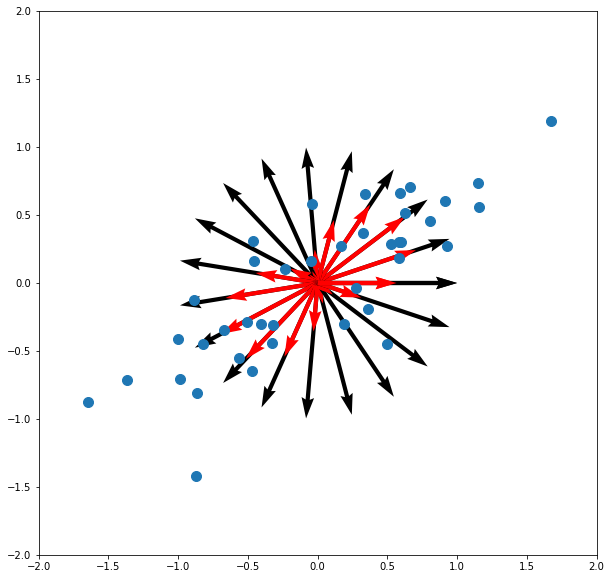

In [3]:
def dataset_fixed_cov():
    '''Generate 2 Gaussians samples with the same covariance matrix'''
    n, dim = 20, 2
    np.random.seed(0)
    C = np.array([[-0.3, 0.1], [0.33, .43]])
    X = np.r_[np.dot(np.random.randn(n, dim), C),
              np.dot(np.random.randn(n, dim), C) + np.array([1, 1])]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y

x, y = dataset_fixed_cov()
x_st = x - x.mean(axis=0)
plt.figure(figsize=(10,10))
for rotate in np.linspace(0, 2 * np.pi, 20):
    v = np.array([np.cos(rotate), np.sin(rotate)])
    v = v / np.dot(v,v) ** (1/2)
    plt.quiver(*v, scale=1, angles = 'xy', scale_units='xy')
    cov_v = np.sum(np.dot(v, x_st.T) ** 2) / len(x)
    plt.quiver(*v * cov_v, scale=1, angles = 'xy', scale_units='xy', color='r')
plt.scatter(x_st[:,0], x_st[:,1], s = 100)
plt.ylim(-2, 2)
plt.xlim(-2, 2)

Однако в задаче присутствуют ограничения в виде равенства $u^T u = 1$. В этой связи для снятия ограничений вводится множитель Лагранжиана $\alpha$.

\begin{equation}
\max\limits_u J(u) = u^T K u - \alpha(u^T u - 1)
\end{equation}

\begin{equation}
\frac{\partial}{\partial u} J(u) = 0
\end{equation}
\begin{equation}
\frac{\partial}{\partial u} u^T K u - \alpha(u^T u - 1) = 0
\end{equation}
\begin{equation}
2 K u - 2\alpha u = 0
\end{equation}
\begin{equation}
Ku = \alpha u
\end{equation}

$\alpha$ - собственное значение ковариационной матрицы $K$, которому соответсвует собственный вектор $u$.

\begin{equation}
\sigma_u^2 = u^T K u = u^T \alpha u
\end{equation}

получаем следуещее:
\begin{equation}
\sigma_u^2 = \alpha
\end{equation}

Максимизация дисперсии проецируемых точек равна наибольшему соственному значению матрицы $K$. Таким образом, собственный вектор с соответсвующим наибольшим собственным числом называется первой главной компонентой. 

#### Минимизация квадратичной ошибки
Теперь покажем, что максимизация дисперсии то же самое, что минимизация среднеквадратической ошибки.
Для каждой точки мы имеем ошибку проецирования на вектор $u$ $\epsilon_i = x_i - x_i'$.
Оптимизация среднеквадратичной ошибки (MSE):

\begin{equation}
MSE(u) = \frac{1}{n}\sum \limits_{i=1}^n ||\epsilon||^2 = \\
\frac{1}{n}\sum \limits_{i=1}^n ||x_i - x_i'||^2 = \\
\frac{1}{n}\sum \limits_{i=1}^n (x_i - x_i')^T (x_i - x_i') = \\
\frac{1}{n}\sum \limits_{i=1}^n (||x_i||^2 - 2x_i^T x_i' + (x_i')^T x_i')
\end{equation}

Заметим, что $x_i' = (u^Tx_i)u$, тогда имеем:

\begin{equation}
= \frac{1}{n}\sum \limits_{i=1}^n (||x_i||^2 - 2x_i^T (u^T x_i) u + ((u^T x_i) u)^T (u^T x_i) u) = \\
= \frac{1}{n}\sum \limits_{i=1}^n (||x_i||^2 - 2 (u^T x_i) (x_i^T u) + (u^T x_i) (x_i^T u) u^T  u) = \\
= \frac{1}{n}\sum \limits_{i=1}^n (||x_i||^2 - (u^T x_i) (x_i^T u)) = \\
= \frac{1}{n}\sum \limits_{i=1}^n ||x_i||^2 - \frac{1}{n}\sum u^T (x_i x_i^T) u = \\
= \frac{1}{n}\sum \limits_{i=1}^n ||x_i||^2 - u^T (\frac{1}{n}\sum  x_i x_i^T) u = \\
= \sum \limits_{i=1}^n \frac{||x_i||^2}{n} - u^T K u
\end{equation}

Причем первый член это дисперсия.

\begin{equation}
var(D) = \frac{1}{n}\sum \limits_{i=1}^n ||x_i - 0||^2 = \frac{1}{n}\sum \limits_{i=1}^n ||x_i||^2
\end{equation}

\begin{equation}
var(D) = tr(K) = \sum \limits_{i=1}^d \sigma_i^2
\end{equation}

Таким образом, можно переписать 
\begin{equation}
MSE(u) = var(D) - u^T K u = \sum \limits_{i=1}^d \sigma_i^2 - u^T K u
\end{equation}

Дисперсия для матрицы $D$ постоянна, вектор $u$ минимизирует $MSE(u)$ и в то же время максимизирует проецируюмую дисперсию $u^T K u$.

Если мы знаем, что вектор $u_1$ наибольший собственный вектор $K$, который максимизирует дисперсию проекции, тогда
\begin{equation}
MSE(u) = var(D) - u_1^T K u_1 = var(D) - u_1^T \lambda_1 u_1 = var(D) - \lambda_1
\end{equation}

### Алгоритм PCA

Дана матрица данных $D$ и коэффициент $\alpha$:
1. вычисляем среднее значение $\mu = \frac{1}{n} \sum \limits_{i=1}^{n} x_i$;
2. центруем матрицу данных $Z = D - 1 \cdot \mu^T$;
3. вычисляем матрицу ковариаций $K = \frac{1}{n} (Z^T Z)$;
4. вычисляем собственные значения $(\lambda_1, \lambda_2, \ldots, \lambda_d)$;
5. вычисляем собственные векторы $U = (u_1 u_2 \ldots u_d)$;
6. вычисляем коэффициент информации $f(r) = \frac{\sum_{i=1}^{r} \lambda_i} {\sum_{i=1}^{n} \lambda_i}$;
7. выбираем наименьший $r$ так, чтобы $f(r) \geq \alpha$;
8. выбираем $r$ первых векторов $U = (u_1 u_2 \ldots u_r)$;
9. уменьшаем признаковое пространство: $A = \{ a_i \: | \: a_i = U_r^T x_i, \: для \: i = 1, \ldots, n \} $

In [4]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = load_digits()
x = data.data
y = data.target

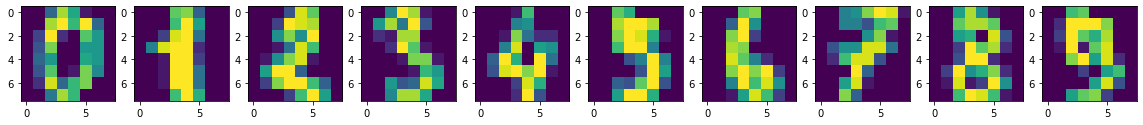

In [5]:
plt.figure(figsize=(20,5))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(x[i].reshape((8,8)))

In [6]:
pca = PCA(n_components=64)
x_trans = pca.fit_transform(x)

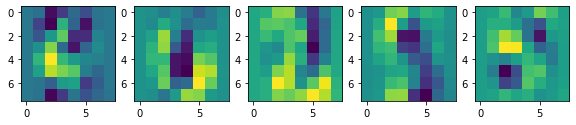

In [7]:
vectors = pca.components_
values = pca.explained_variance_
plt.figure(figsize=(20,10))
for i in range(5):
    plt.subplot(1,10,i+1)
    plt.imshow(values[i] * vectors[i].reshape((8,8)))

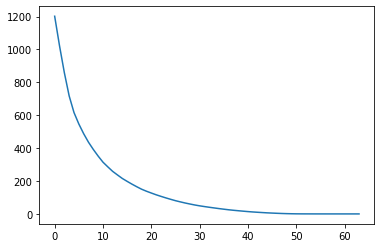

In [8]:
plt.plot(np.cumsum(values[::-1])[::-1])

In [9]:
x_restore = pca.inverse_transform(x_trans[num])

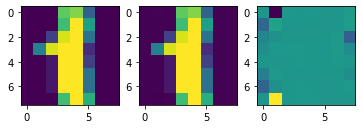

In [14]:
num = 1
num_features = 50
x_restore = np.dot(x_trans[num][:num_features], vectors[:num_features]) + pca.mean_

plt.figure()
plt.subplot(131)
plt.imshow(x[num].reshape((8,8)))
plt.subplot(132)
plt.imshow(x_restore.reshape((8,8)))
plt.subplot(133)
plt.imshow((x[num] - x_restore).reshape((8,8)))

In [120]:
x[num] - x_restore

array([ 1.43538845e-16,  1.52473335e-01, -3.62234454e-01,  6.29377627e-01,
       -3.84462118e-01,  3.05673237e-01, -2.73743475e-01,  3.89313957e-02,
       -2.28297451e-02,  1.20064840e+00,  2.33467381e-01, -2.79951042e-01,
        2.23309536e-01,  1.83105721e-02,  1.92055185e-02,  3.93397060e-02,
       -1.36433008e-02, -1.35241757e+00,  7.99563606e-02,  1.12944336e-01,
       -2.15042896e-01,  6.19047966e-02,  4.31752093e-02, -1.44367151e-03,
       -6.00642766e-03,  1.35408210e+00, -7.32790136e-02, -5.43819087e-02,
        1.09551353e-01, -1.23091869e-01,  1.35859355e-01, -2.67643289e-03,
       -8.21512148e-16, -8.93665652e-01, -1.20899762e-01,  1.96913803e-01,
       -1.74998962e-01,  1.97116252e-01, -2.98326429e-02,  8.02416652e-16,
       -1.24054783e-02,  4.79906264e-01,  1.45710987e-01, -1.47905830e-01,
        1.57336095e-01, -9.70380492e-02, -1.38820036e-01,  2.02660273e-02,
       -2.59643153e-02,  2.99279074e-01, -1.36489702e-01,  2.49205392e-01,
       -2.06427806e-01,  

## Метод сингулярного разложения матриц (SVD)

Для любой матрицы $X$ существуют две вещественные ортогональные матрицы $U$ и $V$ такие, что

\begin{equation}
U^T X V = \Lambda
\end{equation}

необходимо отметить, что матрица $\Lambda$ диагональная:
\begin{equation}
\Lambda = \left(
\begin{array}{cccc}
\lambda_1 & 0 & \ldots & 0 \\
0 & \lambda_2 & \ldots & 0 \\
\ldots & \ldots & \ldots & 0 \\
0 & 0 & \ldots & \lambda_n
\end{array}
\right)
\end{equation}

причем матрицы $U$ и $V$ выбраны так, чтобы диагональные элементы имели вид:

\begin{equation}
\lambda_1 \geq \lambda_2 \geq \ldots \geq \lambda_r > \lambda_{r+1} = \dots = \lambda_n = 0
\end{equation}

Причем индес $r$ показывает ранг матрицы X или фактическую размерность.

Столбцы матрицы $U$ и $V$ содержат левые и правые сингулярные векторы, а значения диагонали матрицы $\Lambda$ называются сингулярными значениями матрицы.

Формулу выше можно переписать иначе, так как матрицы $U$ и $V$ ортогональны ($U^TU = UU^T = I, V^TV = VV^T = I$):

\begin{equation}
X = U \Lambda V^T
\end{equation}

/home/vasily/.virtualenvs/keras/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/home/vasily/.virtualenvs/keras/lib/python3.6/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


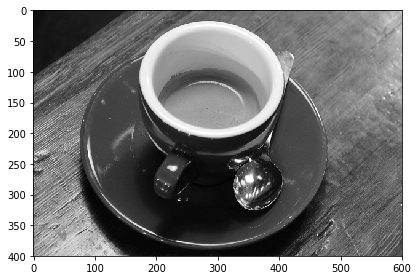

In [39]:
from sklearn.decomposition import PCA
from numpy.linalg import svd
from skimage import data
from skimage import img_as_float
from skimage.color import rgb2gray
from skimage.io import imshow

img = rgb2gray(img_as_float(data.coffee()))
imshow(img)

/home/vasily/.virtualenvs/keras/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/home/vasily/.virtualenvs/keras/lib/python3.6/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


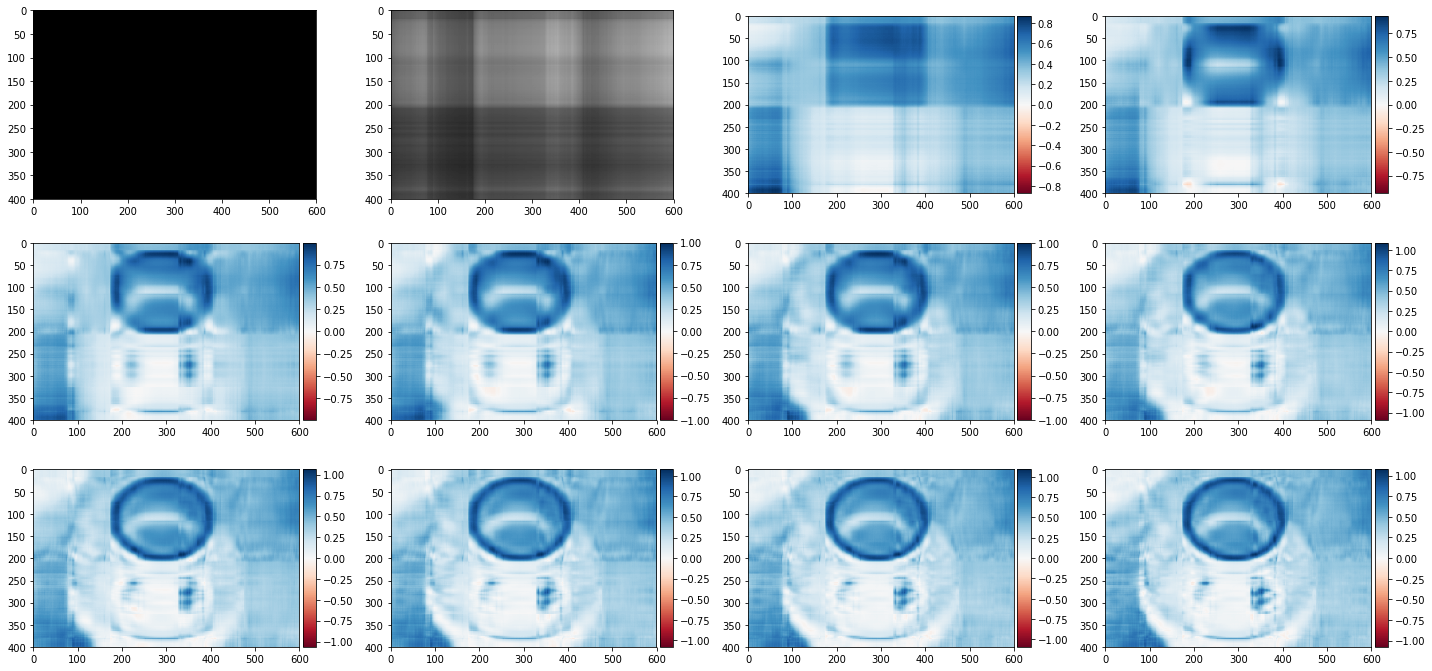

In [40]:
def compr_svd(image, k):
    U, L, V = svd(image, full_matrices=False)
    comp_image = np.dot(U[:,:k], np.dot(np.diag(L[:k]), V[:k,:]))
    return comp_image

plt.figure(figsize=(20,10))
for it in range(12):
    plt.subplot(3, 4, it+1)
    imshow(compr_svd(img, it))

/home/vasily/.virtualenvs/keras/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/home/vasily/.virtualenvs/keras/lib/python3.6/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


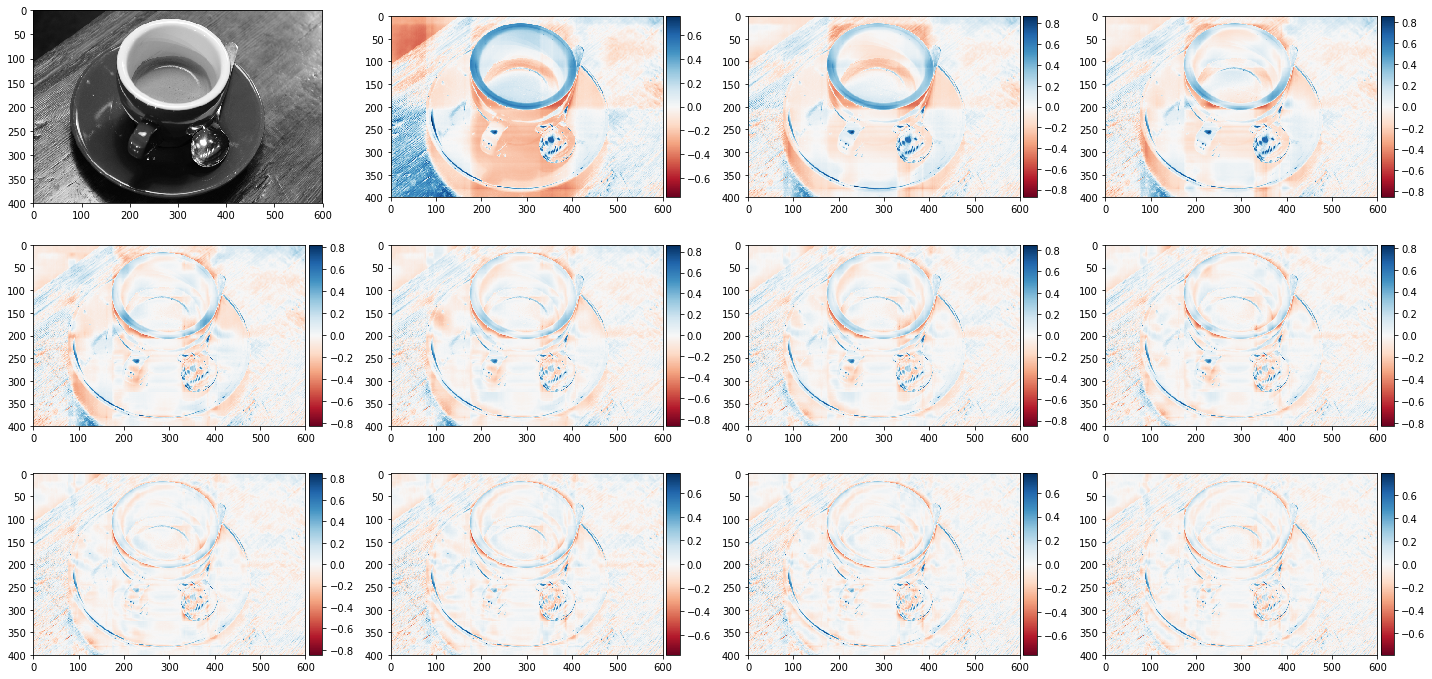

In [43]:
plt.figure(figsize=(20,10))
for it in range(12):
    plt.subplot(3, 4, it+1)
    imshow(img - compr_svd(img, it))

## Автоэнкодер